In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pprint as pp

In [2]:
country_data=pd.read_csv("Resources/daily_aqi_by_county_2022.csv")
country_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2022-01-02,22,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2022-01-05,36,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2022-01-08,35,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2022-01-11,15,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2022-01-14,48,Good,PM2.5,01-003-0010,1


In [3]:
state_data=country_data.groupby("State Name").get_group("New Jersey")
state_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
170383,New Jersey,Atlantic,34,1,2022-01-01,23,Good,Ozone,34-001-0006,1
170384,New Jersey,Atlantic,34,1,2022-01-02,26,Good,Ozone,34-001-0006,2
170385,New Jersey,Atlantic,34,1,2022-01-03,27,Good,Ozone,34-001-0006,1
170386,New Jersey,Atlantic,34,1,2022-01-04,27,Good,Ozone,34-001-0006,1
170387,New Jersey,Atlantic,34,1,2022-01-05,26,Good,Ozone,34-001-0006,2


In [4]:
county_data=state_data.groupby("county Name")
county_data.head()
    

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
170383,New Jersey,Atlantic,34,1,2022-01-01,23,Good,Ozone,34-001-0006,1
170384,New Jersey,Atlantic,34,1,2022-01-02,26,Good,Ozone,34-001-0006,2
170385,New Jersey,Atlantic,34,1,2022-01-03,27,Good,Ozone,34-001-0006,1
170386,New Jersey,Atlantic,34,1,2022-01-04,27,Good,Ozone,34-001-0006,1
170387,New Jersey,Atlantic,34,1,2022-01-05,26,Good,Ozone,34-001-0006,2
...,...,...,...,...,...,...,...,...,...,...
175491,New Jersey,Warren,34,41,2022-01-01,33,Good,PM2.5,34-041-0007,1
175492,New Jersey,Warren,34,41,2022-01-02,23,Good,PM2.5,34-041-0007,1
175493,New Jersey,Warren,34,41,2022-01-03,24,Good,Ozone,34-041-0007,1
175494,New Jersey,Warren,34,41,2022-01-04,34,Good,PM2.5,34-041-0007,1


In [5]:
grouped_data = state_data.groupby(['Defining Parameter', 'county Name'])
grouped_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
170383,New Jersey,Atlantic,34,1,2022-01-01,23,Good,Ozone,34-001-0006,1
170384,New Jersey,Atlantic,34,1,2022-01-02,26,Good,Ozone,34-001-0006,2
170385,New Jersey,Atlantic,34,1,2022-01-03,27,Good,Ozone,34-001-0006,1
170386,New Jersey,Atlantic,34,1,2022-01-04,27,Good,Ozone,34-001-0006,1
170387,New Jersey,Atlantic,34,1,2022-01-05,26,Good,Ozone,34-001-0006,2
...,...,...,...,...,...,...,...,...,...,...
175508,New Jersey,Warren,34,41,2022-01-18,32,Good,NO2,34-041-0007,1
175516,New Jersey,Warren,34,41,2022-01-26,32,Good,NO2,34-041-0007,1
175538,New Jersey,Warren,34,41,2022-02-17,35,Good,NO2,34-041-0007,1
175545,New Jersey,Warren,34,41,2022-02-24,19,Good,NO2,34-041-0007,1


In [6]:
grouped_mean=grouped_data["AQI"].mean()
grouped_mean

Defining Parameter  county Name
CO                  Essex           2.000000
                    Hudson         37.500000
NO2                 Bergen         32.841584
                    Camden         34.294118
                    Cumberland     25.750000
                    Essex          39.903846
                    Hudson         36.916667
                    Middlesex      29.529412
                    Morris         22.166667
                    Union          36.621622
                    Warren         25.857143
Ozone               Atlantic       33.141343
                    Bergen         41.440678
                    Camden         41.391753
                    Cumberland     37.149351
                    Essex          41.630573
                    Gloucester     44.102459
                    Hudson         40.591716
                    Hunterdon      39.248148
                    Mercer         42.783333
                    Middlesex      40.446215
                    Mon

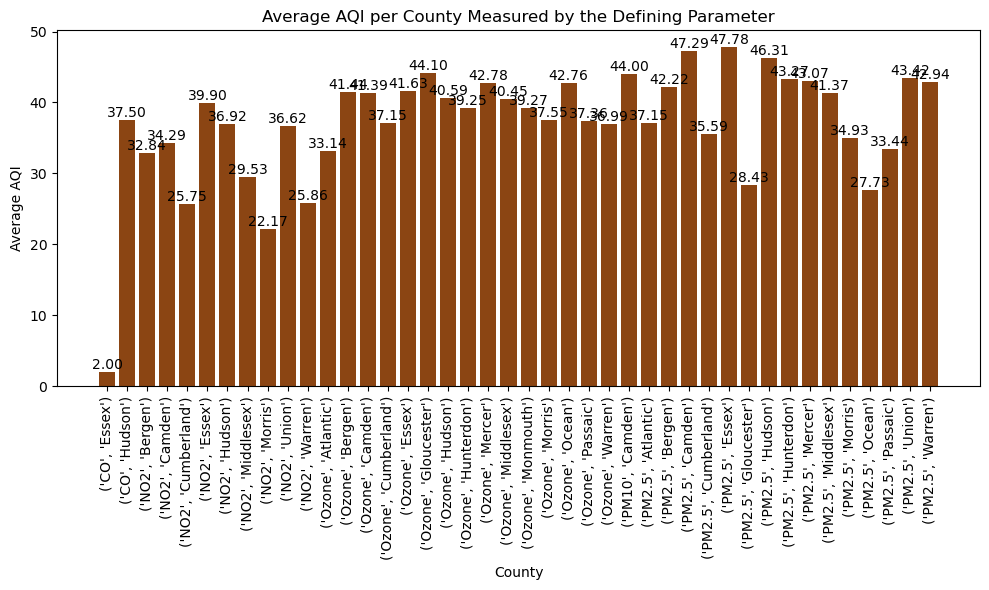

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(grouped_mean)), grouped_mean, color="saddlebrown", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by the Defining Parameter")
ax.set_xticks(range(len(grouped_mean)))
ax.set_xticklabels(grouped_mean.index, rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')


plt.tight_layout()
plt.show()

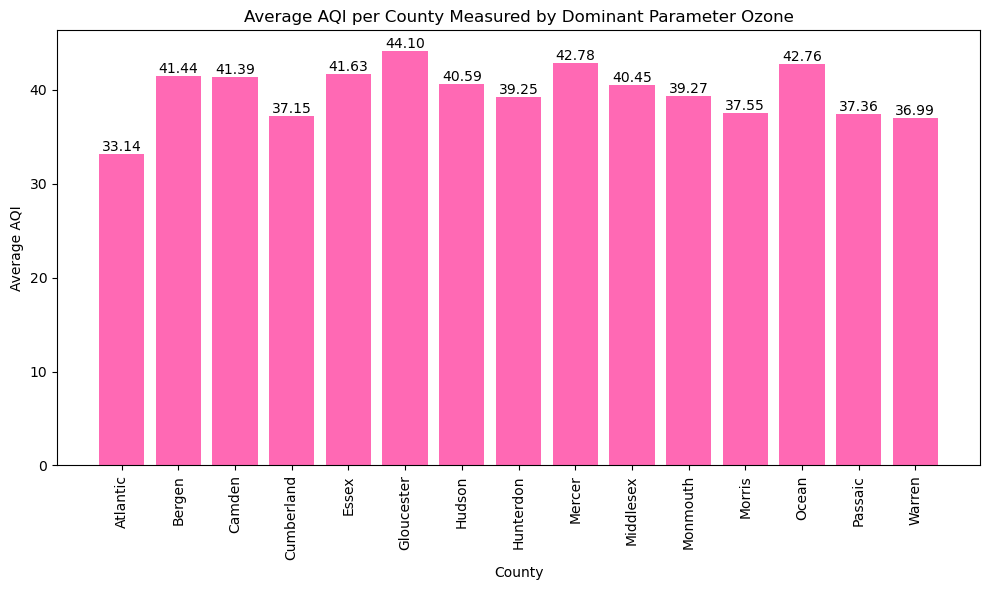

In [8]:
grouped_mean_ozone = grouped_mean[grouped_mean.index.get_level_values(0) == 'Ozone']


fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(range(len(grouped_mean_ozone)), grouped_mean_ozone, color="hotpink", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter Ozone")
ax.set_xticks(range(len(grouped_mean_ozone)))
ax.set_xticklabels(grouped_mean_ozone.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

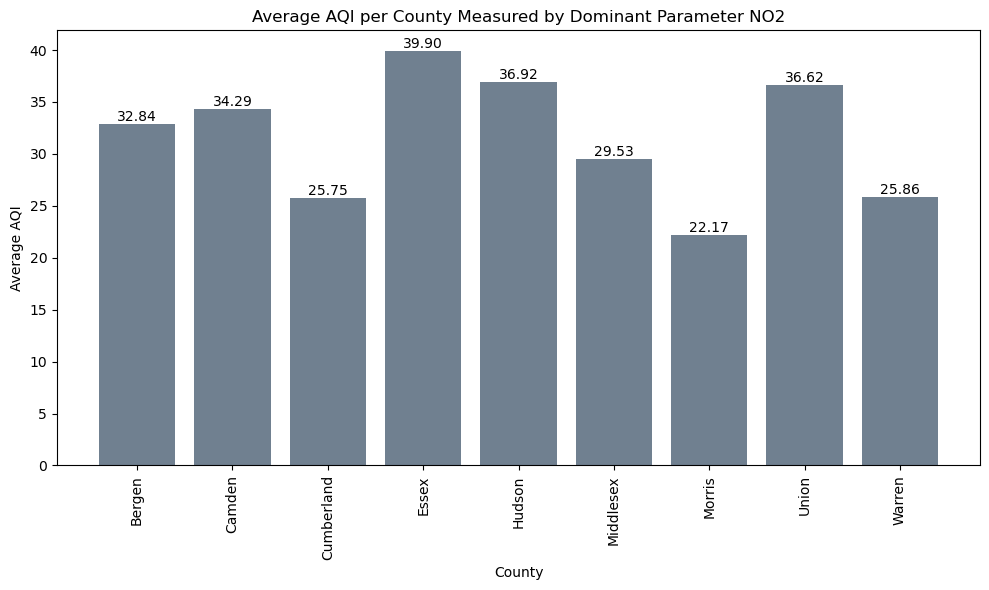

In [9]:
grouped_mean_no2 = grouped_mean[grouped_mean.index.get_level_values(0) == 'NO2']


fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(grouped_mean_no2)), grouped_mean_no2, color="slategray", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter NO2")
ax.set_xticks(range(len(grouped_mean_no2)))
ax.set_xticklabels(grouped_mean_no2.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}',  # Display the height with two decimal places
            ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

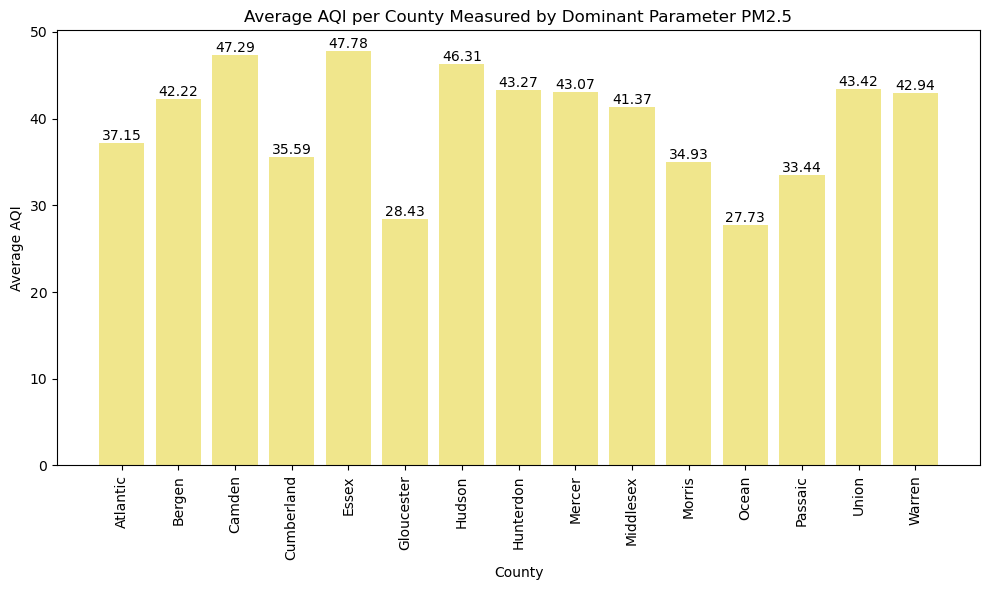

In [10]:
grouped_mean_pm = grouped_mean[grouped_mean.index.get_level_values(0) == 'PM2.5']


fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(grouped_mean_pm)), grouped_mean_pm, color="khaki", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter PM2.5")
ax.set_xticks(range(len(grouped_mean_pm)))
ax.set_xticklabels(grouped_mean_pm.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}',  # Display the height with two decimal places
            ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

In [11]:
import calplot as calplot
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd

In [12]:
#state_data_date = pd.to_datetime(state_data['Date'], format='%Y-%m-%d')
#state_data_date


In [13]:
# warren_county_data = grouped_data.get_group(('Ozone','Warren')) 
# median_aqi_per_day = warren_county_data.groupby('Date')['AQI'].median()

# aqi_series = pd.Series(median_aqi_per_day.values, index=pd.to_datetime(median_aqi_per_day.index))

# calplot.calplot(aqi_series, edgecolor=None, cmap='coolwarm')

#state_data.index = pd.to_datetime(state_data.index)
#state_data['Date'] = state_data.index.year
#state_data.head()

# nj_2022_atlantic_df = state_data.loc[state_data['county Name'] == 'Atlantic']
# nj_2022_atlantic_df
# #set date as the index
# nj_2022_atlantic_df.set_index('Date', inplace=True)
# print(nj_2022_atlantic_df)
# #create a calplot for the atlantic city heat map 
# calplot.calplot(
#    nj_2022_atlantic_df['AQI'], 
#     cmap='RdYlGn_r', 
#     colorbar=True, 
#     suptitle='Air Quality Index (AQI) Heatmap - 2022 for Atlantic County', 
#     figsize=(16, 8)
# )
# plt.show()


In [14]:
nj_factories=pd.read_csv("Resources/nj_factories.csv")
nj_factories

,Reporting Year,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,GHG QUANTITY (METRIC TONS CO2e),SUBPARTS
0,2022,"ANHEUSER-BUSCH, INC. NEWARK BREWERY",1003525,200 US HIGHWAY ONE,40.691600,-74.191600,NEWARK,ESSEX COUNTY,NJ,7114,ANHEUSER-BUSCH COS LLC (100%),23836,C
1,2022,ATLANTIC COUNTY LANDFILL,1001858,6700 Delilah Road,39.416530,-74.540360,EGG HARBOR TOWNSHIP,ATLANTIC COUNTY,NJ,8234,ATLANTIC COUNTY UTILITIES AUTHORITY (100%),44220,"C,HH"
2,2022,Ardagh Glass Inc. (Bridgeton),1002504,443 S EAST AVE,39.409000,-75.219580,BRIDGETON,CUMBERLAND COUNTY,NJ,8302,ARDAGH GLASS INC (100%),54017,"C,N"
3,2022,BRISTOL MYERS SQUIBB INC,1006828,ONE SQUIBB DRIVE,40.474920,-74.445110,NORTH BRUNSWICK,MIDDLESEX COUNTY,NJ,8902,BRISTOL-MYERS SQUIBB CO (100%),54360,C
4,2022,BURLINGTON CNTY RESOURCE RECOVERY COMPLEX,1006969,21939 COLUMBUS ROAD,40.082778,-74.713889,COLUMBUS,BURLINGTON COUNTY,NJ,8022,BURLINGTON COUNTY NEW JERSEY (100%),46766,"C,HH"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2022,United States Army Garrison,1013188,Route 15N,40.917176,-74.580558,Picatinny Arsenal,NaN,NJ,7806,US GOVERNMENT (%),28221,C
85,2022,"Vicinity Energy Trenton, L.P.",1003084,320 S. Warren Street,40.216903,-74.765378,Trenton,MERCER COUNTY,NJ,8608,VICINITY ENERGY INC (100%),29132,C
86,2022,"WHEELABRATOR GLOUCESTER COMPANY, L.P.",1004279,NaN,39.873864,-75.138677,WESTVILLE,GLOUCESTER COUNTY,NJ,8093,WHEELABRATOR TECHNOLOGIES HOLDINGS INC (100%),61540,C
87,2022,West Deptford Energy Station,1011543,3 Paradise Road,39.837310,-75.224580,West Deptford,GLOUCESTER COUNTY,NJ,8066,LS POWER EQUITY PARTNERS LP (100%),770239,"C,D"


In [15]:
factory_counties=nj_factories.groupby('COUNTY NAME')
factory_counties.head()

,Reporting Year,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,GHG QUANTITY (METRIC TONS CO2e),SUBPARTS
0,2022,"ANHEUSER-BUSCH, INC. NEWARK BREWERY",1003525,200 US HIGHWAY ONE,40.691600,-74.191600,NEWARK,ESSEX COUNTY,NJ,7114,ANHEUSER-BUSCH COS LLC (100%),23836,C
1,2022,ATLANTIC COUNTY LANDFILL,1001858,6700 Delilah Road,39.416530,-74.540360,EGG HARBOR TOWNSHIP,ATLANTIC COUNTY,NJ,8234,ATLANTIC COUNTY UTILITIES AUTHORITY (100%),44220,"C,HH"
2,2022,Ardagh Glass Inc. (Bridgeton),1002504,443 S EAST AVE,39.409000,-75.219580,BRIDGETON,CUMBERLAND COUNTY,NJ,8302,ARDAGH GLASS INC (100%),54017,"C,N"
3,2022,BRISTOL MYERS SQUIBB INC,1006828,ONE SQUIBB DRIVE,40.474920,-74.445110,NORTH BRUNSWICK,MIDDLESEX COUNTY,NJ,8902,BRISTOL-MYERS SQUIBB CO (100%),54360,C
4,2022,BURLINGTON CNTY RESOURCE RECOVERY COMPLEX,1006969,21939 COLUMBUS ROAD,40.082778,-74.713889,COLUMBUS,BURLINGTON COUNTY,NJ,8022,BURLINGTON COUNTY NEW JERSEY (100%),46766,"C,HH"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2022,TGP Station 325 Sussex,1008247,164 Libertyville Rd,41.236630,-74.649690,Sussex,SUSSEX COUNTY,NJ,7461,KINDER MORGAN INC (100%),63315,"C,W"
82,2022,TRUSTEES OF PRINCETON UNIVERSITY,1001868,DEPT OF ENGINEERING MACMILLAN BLDG ELM DR,40.354641,-74.646744,PRINCETON,MERCER COUNTY,NJ,8543,THE TRUSTEES OF PRINCETON UNIVERSITY (100%),69076,C
83,2022,UNION COUNTY RESOURCE RECOVERY FACILITY,1002269,1499 US RT 1 & 9 NORTH,40.604178,-74.282486,RAHWAY,UNION COUNTY,NJ,7065,COVANTA HOLDING CORP (100%),240382,C
85,2022,"Vicinity Energy Trenton, L.P.",1003084,320 S. Warren Street,40.216903,-74.765378,Trenton,MERCER COUNTY,NJ,8608,VICINITY ENERGY INC (100%),29132,C


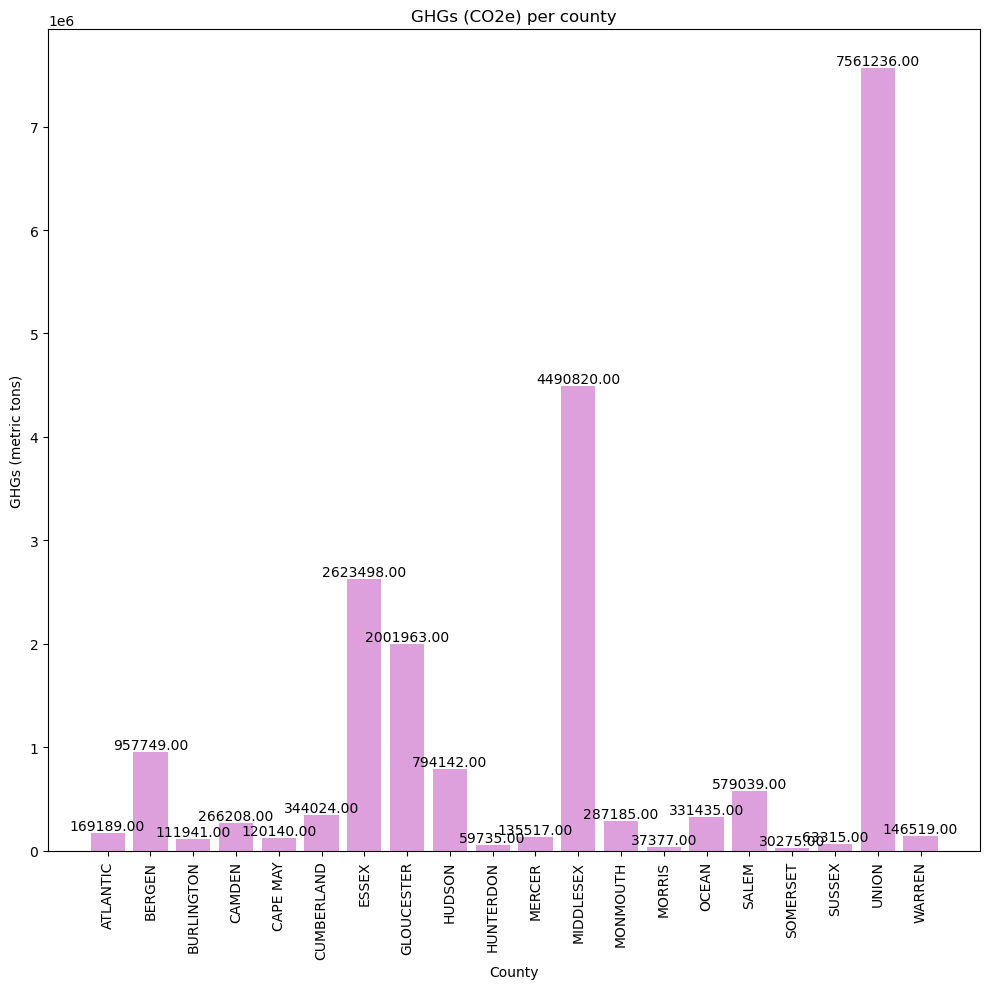

In [38]:
import re

# Normalize the county names by removing specific words like "COUNTY"
nj_factories['COUNTY NAME'] = nj_factories['COUNTY NAME'].str.replace(r'\bCOUNTY\b', '', regex=True)
nj_factories['COUNTY NAME'] = nj_factories['COUNTY NAME'].str.strip().str.upper()

# Sum the GHG quantities per county after grouping by the normalized county names
ghg_values = nj_factories.groupby('COUNTY NAME')['GHG QUANTITY (METRIC TONS CO2e)'].sum()

# Extract the county names from the DataFrame
county_names = ghg_values.index

fig, ax = plt.subplots(figsize=(10, 10))

bars = ax.bar(range(len(county_names)), ghg_values, color="plum", align="center")

ax.set_xlabel("County")
ax.set_ylabel("GHGs (metric tons)")
ax.set_title("GHGs (CO2e) per county")
ax.set_xticks(range(len(county_names)))
ax.set_xticklabels(county_names, rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}',  # Display the height with two decimal places
            ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

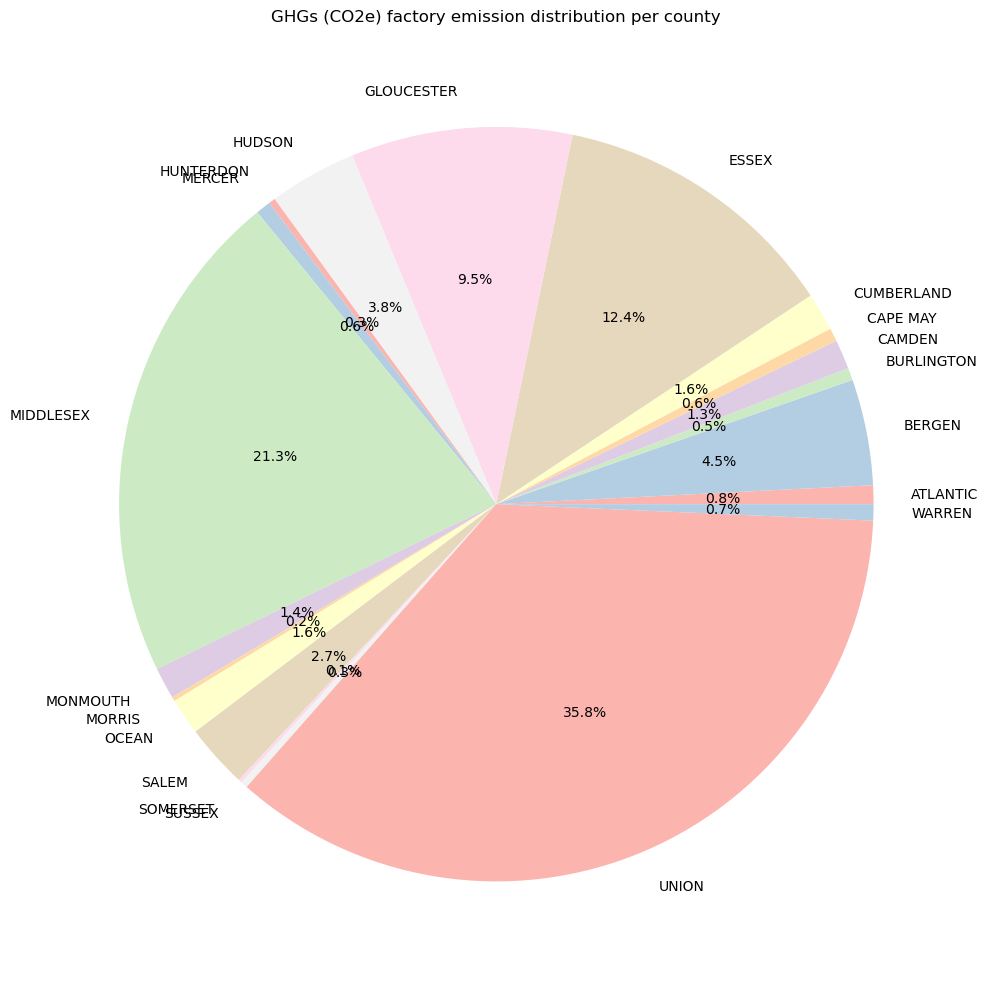

In [41]:
ghg_percentages = ghg_values / ghg_values.sum() * 100


fig, ax = plt.subplots(figsize=(10, 10))
colors = plt.cm.Pastel1.colors 

wedges, texts, autotexts = ax.pie(ghg_percentages, labels=county_names, autopct='%1.1f%%', colors=colors)


ax.axis('equal')


ax.set_title("GHGs (CO2e) factory emission distribution per county")


plt.tight_layout()

In [73]:
top_counties = ghg_percentages.sort_values(ascending=False)
top_3_counties = top_counties.head(3)
print(top_3_counties)

COUNTY NAME
UNION        35.816049
MIDDLESEX    21.272108
ESSEX        12.426980
Name: GHG QUANTITY (METRIC TONS CO2e), dtype: float64


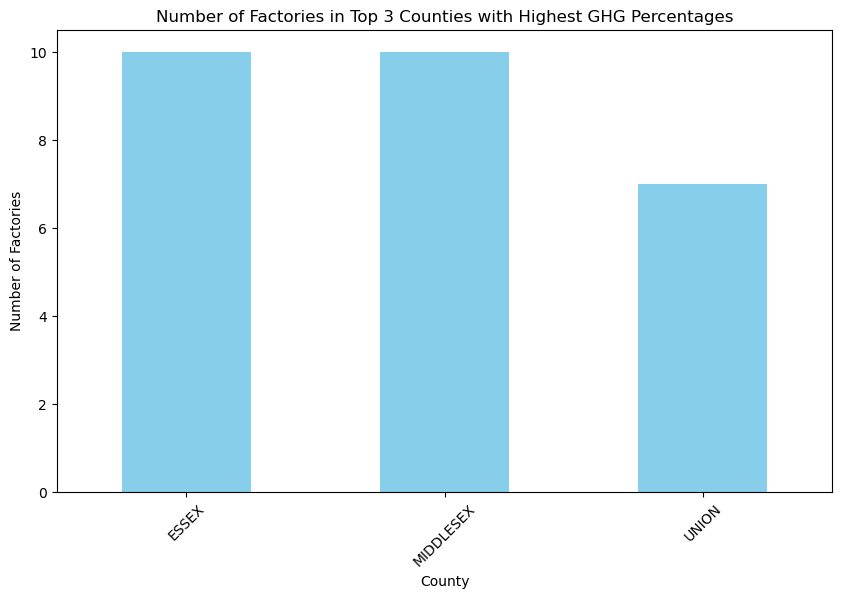

In [76]:
top_3_counties = top_counties.head(3).index  # Get the names of the top 3 counties
factories_top_3 = nj_factories[nj_factories['COUNTY NAME'].isin(top_3_counties)]

# Count the number of factories in each of the top 3 counties
factory_counts = factories_top_3['COUNTY NAME'].value_counts()

# Create a bar graph to visualize the factory counts for each county
plt.figure(figsize=(10, 6))
factory_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Factories in Top 3 Counties with Highest GHG Percentages')
plt.xlabel('County')
plt.ylabel('Number of Factories')
plt.xticks(rotation=45)
plt.show()

In [79]:
# Assuming df_factories is your DataFrame containing factory data with a 'COUNTY NAME' column

# Filter the DataFrame to include only the factories in the top 3 counties
top_3_counties = top_counties.head(3).index  # Get the names of the top 3 counties
factories_top_3 = nj_factories[nj_factories['COUNTY NAME'].isin(top_3_counties)]

# Display a list of all the factories in the top 3 counties
for county in top_3_counties:
    print(f"Factories in {county}:")
    for factory in factories_top_3[ factories_top_3['COUNTY NAME'] == county ]['FACILITY NAME']:
        print(factory)
    print()

Factories in UNION:
E F Kenilworth, Inc.
Elizabethtown Gas
Linden Cogeneration Facility
Linden Generating Station
MERCK SHARP & DOHME LLC - RAHWAY
Phillips 66 BAYWAY REFINERY
UNION COUNTY RESOURCE RECOVERY FACILITY

Factories in MIDDLESEX:
BRISTOL MYERS SQUIBB INC
CMC Steel New Jersey
EFS Parlin Holdings, LLC
Edgeboro Landfill
Middlesex County Landfill
RUTGERS UNIVERSITY BUSCH - LIVINGSTON CAMPUSE
Red Oak Power LLC
Sayreville Power LP
Sewaren Generating Station
Woodbridge Energy Center

Factories in ESSEX:
ANHEUSER-BUSCH, INC. NEWARK BREWERY
ESSEX COUNTY RESOURCE RECOVERY FACILITY
Essex
Montclair State University
Newark Bay Cogen
Newark Energy Center, LLC
PASSAIC VALLEY SEWER COMM
PB NUTCLIF MASTER, LLC
PSE&G
Rutgers Health Science Campus at Newark



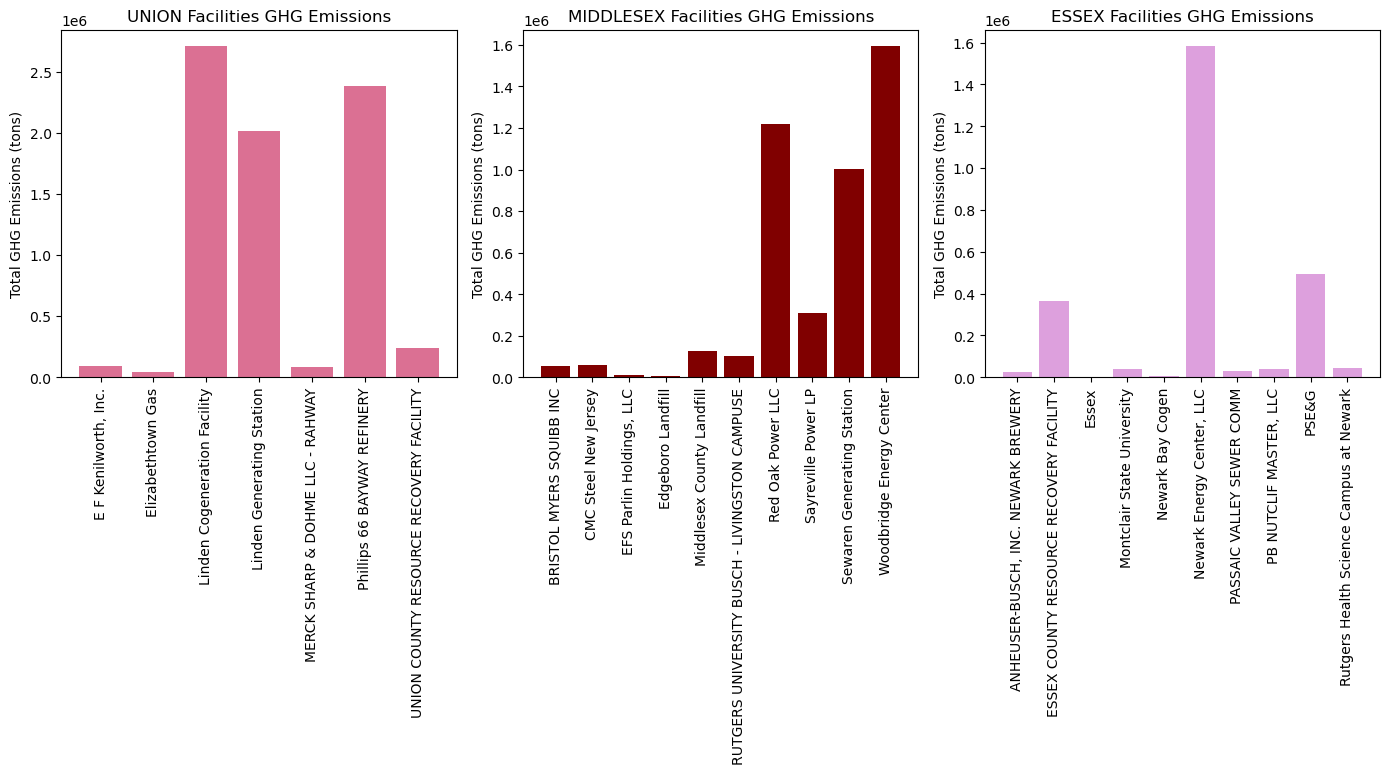

In [83]:
import matplotlib.pyplot as plt

# Define the factories and their total GHG emissions
factories_union = {
    'E F Kenilworth, Inc.': 89235,
    'Elizabethtown Gas': 40835,
    'Linden Cogeneration Facility': 2709778,
    'Linden Generating Station': 2014257,
    'MERCK SHARP & DOHME LLC - RAHWAY': 83731,
    'Phillips 66 BAYWAY REFINERY': 2383018,
    'UNION COUNTY RESOURCE RECOVERY FACILITY': 240382
}

factories_middlesex = {
    'BRISTOL MYERS SQUIBB INC': 54360,
    'CMC Steel New Jersey': 60466,
    'EFS Parlin Holdings, LLC': 12968,
    'Edgeboro Landfill': 7229,
    'Middlesex County Landfill': 124304,
    'RUTGERS UNIVERSITY BUSCH - LIVINGSTON CAMPUSE': 103294,
    'Red Oak Power LLC': 1221138,
    'Sayreville Power LP': 309938,
    'Sewaren Generating Station': 1002724,
    'Woodbridge Energy Center': 1594399
}

factories_essex = {
    'ANHEUSER-BUSCH, INC. NEWARK BREWERY': 23836,
    'ESSEX COUNTY RESOURCE RECOVERY FACILITY': 366458,
    'Essex': 636,
    'Montclair State University': 38103,
    'Newark Bay Cogen': 6416,
    'Newark Energy Center, LLC': 1583414,
    'PASSAIC VALLEY SEWER COMM': 30063,
    'PB NUTCLIF MASTER, LLC': 40237,
    'PSE&G': 491656,
    'Rutgers Health Science Campus at Newark': 42679
}

# Create the bar chart for each union
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
plt.bar(factories_union.keys(), factories_union.values(), color='palevioletred')
plt.xticks(rotation=90)
plt.title('UNION Facilities GHG Emissions')
plt.ylabel('Total GHG Emissions (tons)')

plt.subplot(1, 3, 2)
plt.bar(factories_middlesex.keys(), factories_middlesex.values(), color='maroon')
plt.xticks(rotation=90)
plt.title('MIDDLESEX Facilities GHG Emissions')
plt.ylabel('Total GHG Emissions (tons)')

plt.subplot(1, 3, 3)
plt.bar(factories_essex.keys(), factories_essex.values(), color='plum')
plt.xticks(rotation=90)
plt.title('ESSEX Facilities GHG Emissions')
plt.ylabel('Total GHG Emissions (tons)')

plt.tight_layout()
plt.show()